<a href="https://colab.research.google.com/github/funmeen/legendary-eureka/blob/main/Naive_Bayes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv('/content/Heart.csv')
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [17]:
chestpain_counts = df['ChestPain'].value_counts()
print(chestpain_counts)

ChestPain
asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: count, dtype: int64


In [20]:
AHD_counts = df['AHD_Yes'].value_counts()
print(AHD_counts)

AHD_Yes
False    164
True     139
Name: count, dtype: int64


In [32]:
chestpain_AHD_counts = df.groupby('ChestPain')['AHD_Yes'].value_counts().unstack(fill_value=0)
print(chestpain_AHD_counts)

AHD_Yes       False  True 
ChestPain                 
asymptomatic     39    105
nonanginal       68     18
nontypical       41      9
typical          16      7


In [41]:

df['ChestPain'] = df['ChestPain'].astype('category')
df['ChestPain'] = df['ChestPain'].cat.codes
df['Thal'] = df['Thal'].astype('category')
df['Thal'] = df['Thal'].cat.codes
df['AHD_Yes'] = df['AHD_Yes'].astype('category')
df['AHD_Yes'] = df['AHD_Yes'].cat.codes
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD_Yes
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,1,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,2,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,3,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,2,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,3,1
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,3,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,3,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,2,1


In [46]:
df.isnull().sum()
df = df.dropna()
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD_Yes
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,1,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,2,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,3,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,2,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,0,123,1,0.2,2,0.0,3,1
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,3,1
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,3,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,3,1


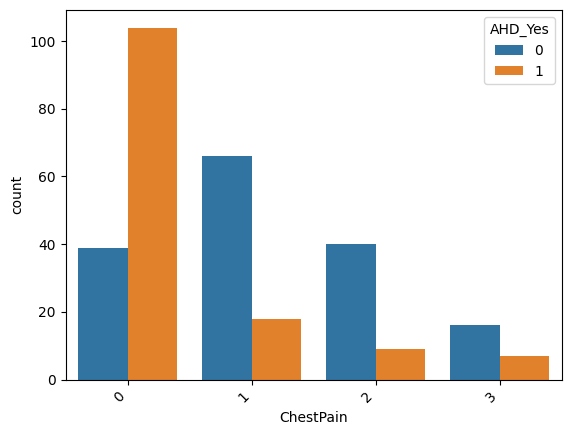

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x='ChestPain',hue='AHD_Yes')
plt.xticks(rotation=45, ha='right');

In [48]:
pre_df = pd.get_dummies(df,columns=['ChestPain'],drop_first=True)
pre_df.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD_Yes,ChestPain_1,ChestPain_2,ChestPain_3
0,63,1,145,233,1,2,150,0,2.3,3,0.0,1,0,False,False,True
1,67,1,160,286,0,2,108,1,1.5,2,3.0,2,1,False,False,False
2,67,1,120,229,0,2,129,1,2.6,2,2.0,3,1,False,False,False
3,37,1,130,250,0,0,187,0,3.5,3,0.0,2,0,True,False,False
4,41,0,130,204,0,2,172,0,1.4,1,0.0,2,0,False,True,False


In [49]:
from sklearn.model_selection import train_test_split

X = pre_df.drop('AHD_Yes', axis=1)
y = pre_df['AHD_Yes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

In [50]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train);

In [51]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.797979797979798
F1 Score: 0.8030345507216828


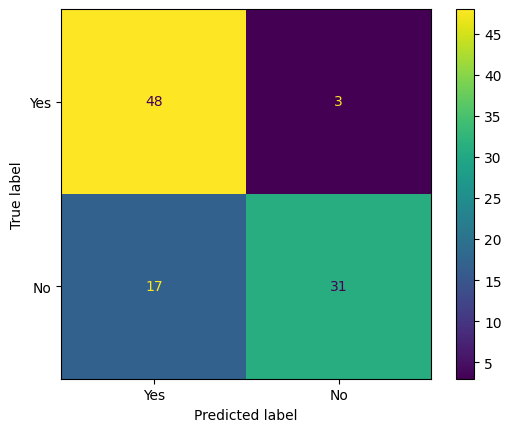

In [52]:
labels = ["Yes", "No"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();